In [349]:
import pandas as pd

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import datetime
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split

In [350]:
df = pd.read_csv("../../preprocessed_data/[10분 단위]아파트_층별_소비전력_2023-03-16 06.30.00 ~ 2023-08-30 10.30.00.csv", usecols=[1,2,3,4])

df

,TIMESTAMP,BUILDING,FLOOR,CONSUMPTION(W)
0,2023-03-16 06:30:00,561,1,225
1,2023-03-16 06:40:00,561,1,217
2,2023-03-16 06:50:00,561,1,212
3,2023-03-16 07:00:00,561,1,88
4,2023-03-16 07:10:00,561,1,435
...,...,...,...,...
1588813,2023-08-30 09:50:00,563,24,366
1588814,2023-08-30 10:00:00,563,24,545
1588815,2023-08-30 10:10:00,563,24,567
1588816,2023-08-30 10:20:00,563,24,547


In [351]:
# buildings = [561, 562, 563]
# final_df = pd.DataFrame()
# sum_cnt = 4

# for building in buildings:
#     for floor in range(1, 5):
#         start_floor = 1

#         floor_df = total_df.query("`BUILDING` == @building and `FLOOR` == (@start_floor + @i)")
#         floor_df['TIMESTAMP'] = pd.to_datetime(floor_df['TIMESTAMP'])
#         floor_df.set_index(floor_df['TIMESTAMP'], drop=True, inplace=True)
#         floor_df.drop(['BUILDING', 'FLOOR','TIMESTAMP'], axis=1, inplace=True)
#         floor_df['CONSUMPTION(W)'] /= 1000
#         floor_df = floor_df.resample(rule='60T').max()

#         for i in range(1, sum_cnt):
#             df = total_df.query("`BUILDING` == @building and `FLOOR` == (@start_floor + @i)")
#             df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
#             df.set_index(df['TIMESTAMP'], drop=True, inplace=True)
#             df.drop(['BUILDING', 'FLOOR','TIMESTAMP'], axis=1, inplace=True)
#             df['CONSUMPTION(W)'] /= 1000
#             df = df.resample(rule='60T').max()
            
#             floor_df += df

#         floor_df.reset_index(inplace=True)
#         start_floor += sum_cnt
#         floor_df['BUILDING'] = building
#         floor_df['FLOOR'] = floor
#         floor_df.rename(columns={'CONSUMPTION(W)' : 'CONSUMPTION(kW)'}, inplace=True)

#         floor_df = floor_df.iloc[int(len(floor_df)*0.9):]
        
#         final_df = pd.concat([final_df, floor_df])

#         if start_floor > 16:
#             continue

# final_df = final_df[['TIMESTAMP', 'BUILDING', 'FLOOR', 'CONSUMPTION(kW)']]
# final_df.reset_index(drop=True,inplace=True)
# final_df

In [352]:
# final_df.to_csv("../../preprocessed_data/[DB]아파트_층별_소비전력_1시간_2023-03-16 06.00.00 ~ 2023-08-30 10.00.00.csv")

In [353]:
df_561_1 = df.query("`BUILDING` == 561 and `FLOOR` == 1")

df_561_1['TIMESTAMP'] = pd.to_datetime(df_561_1['TIMESTAMP'])
df_561_1.set_index(df_561_1['TIMESTAMP'], drop=True, inplace=True)
df_561_1.drop(['BUILDING', 'FLOOR','TIMESTAMP'], axis=1, inplace=True)
df_561_1['CONSUMPTION(W)'] /= 1000

df_561_1 = df_561_1.resample(rule='60T').max()
df_561_1

C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\4098826335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_1['TIMESTAMP'] = pd.to_datetime(df_561_1['TIMESTAMP'])
C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\4098826335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_1.drop(['BUILDING', 'FLOOR','TIMESTAMP'], axis=1, inplace=True)
C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\4098826335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:00:00,0.225
2023-03-16 07:00:00,0.435
2023-03-16 08:00:00,0.323
2023-03-16 09:00:00,0.346
2023-03-16 10:00:00,0.335
...,...
2023-08-30 06:00:00,0.490
2023-08-30 07:00:00,0.482
2023-08-30 08:00:00,0.505


<Axes: xlabel='TIMESTAMP'>

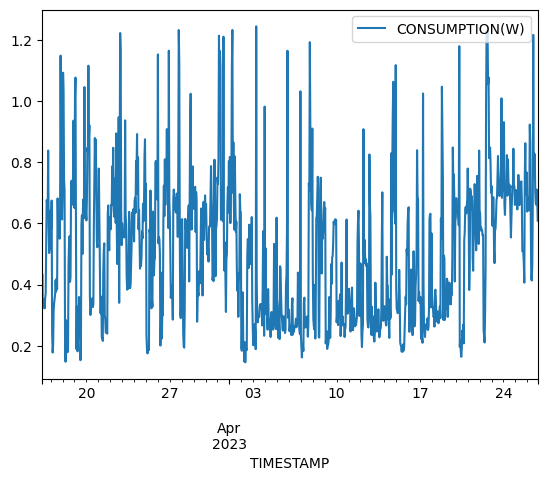

In [354]:
df_561_1.head(1000).plot()

In [355]:
df_561_2 = df.query("`BUILDING` == 561 and `FLOOR` == 2")
df_561_2['TIMESTAMP'] = pd.to_datetime(df_561_2['TIMESTAMP'])
df_561_2.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
df_561_2.set_index('TIMESTAMP', inplace=True)

df_561_2['CONSUMPTION(W)'] /= 1000
df_561_2 = df_561_2.resample(rule='60T').max()
df_561_2


C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\631665058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_2['TIMESTAMP'] = pd.to_datetime(df_561_2['TIMESTAMP'])
C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\631665058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_2.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\631665058.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:00:00,0.256
2023-03-16 07:00:00,0.361
2023-03-16 08:00:00,0.736
2023-03-16 09:00:00,0.791
2023-03-16 10:00:00,1.098
...,...
2023-08-30 06:00:00,0.305
2023-08-30 07:00:00,0.553
2023-08-30 08:00:00,0.386


<Axes: xlabel='TIMESTAMP'>

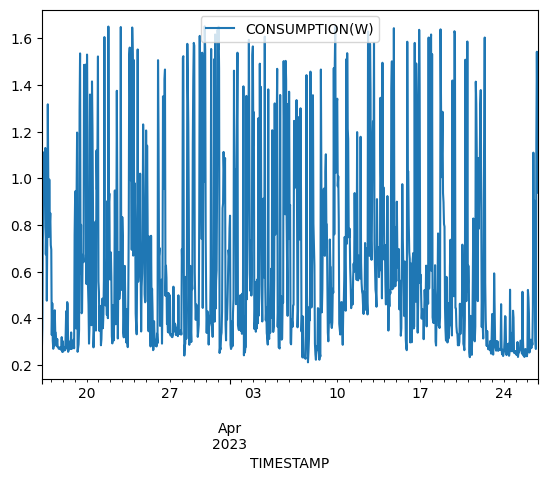

In [356]:
df_561_2.head(1000).plot()

<Axes: xlabel='TIMESTAMP'>

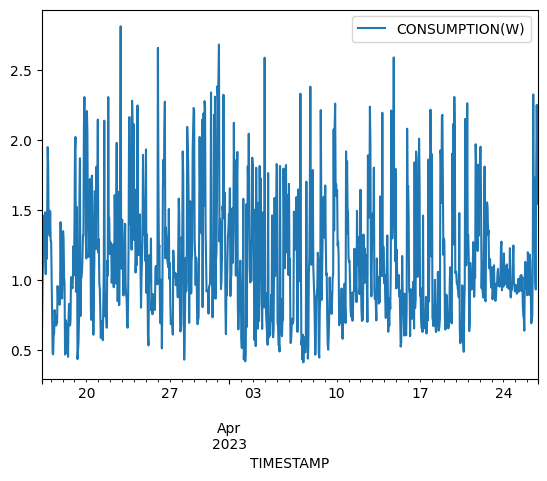

In [357]:
df_12 = df_561_1 + df_561_2

df_12.head(1000).plot()

In [358]:
df_561_3 = df.query("`BUILDING` == 561 and `FLOOR` == 3")
df_561_3['TIMESTAMP'] = pd.to_datetime(df_561_3['TIMESTAMP'])
df_561_3.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
df_561_3.set_index('TIMESTAMP', inplace=True)
df_561_3['CONSUMPTION(W)'] /= 1000
df_561_3 = df_561_3.resample(rule='60T').max()
df_561_3



C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\1592084655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_3['TIMESTAMP'] = pd.to_datetime(df_561_3['TIMESTAMP'])
C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\1592084655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_3.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\1592084655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:00:00,0.264
2023-03-16 07:00:00,0.297
2023-03-16 08:00:00,0.392
2023-03-16 09:00:00,0.980
2023-03-16 10:00:00,1.094
...,...
2023-08-30 06:00:00,0.593
2023-08-30 07:00:00,0.465
2023-08-30 08:00:00,0.437


<Axes: xlabel='TIMESTAMP'>

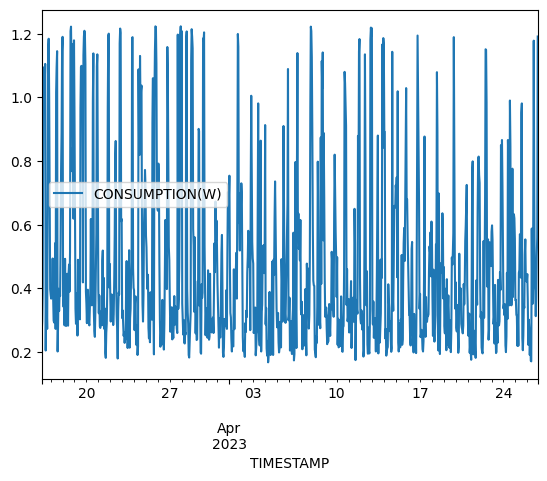

In [359]:
df_561_3.head(1000).plot()

<Axes: xlabel='TIMESTAMP'>

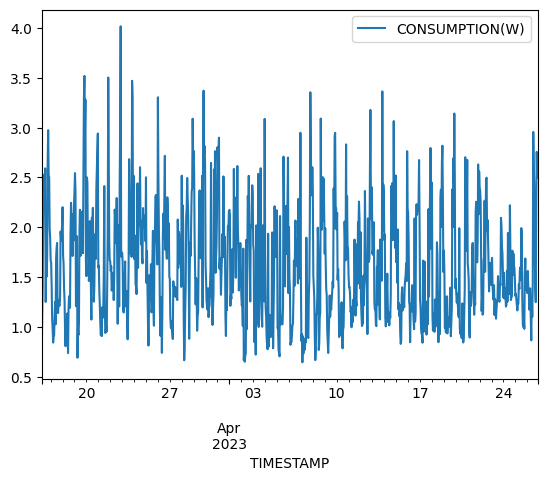

In [360]:
df_123 = df_561_1 + df_561_2 + df_561_3

df_123.head(1000).plot()

In [361]:
df_561_4 = df.query("`BUILDING` == 561 and `FLOOR` == 4")
df_561_4['TIMESTAMP'] = pd.to_datetime(df_561_4['TIMESTAMP'])
df_561_4.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
df_561_4.set_index('TIMESTAMP', inplace=True)
df_561_4['CONSUMPTION(W)'] /= 1000
df_561_4 = df_561_4.resample(rule='60T').max()
df_561_4



C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\3816613399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_4['TIMESTAMP'] = pd.to_datetime(df_561_4['TIMESTAMP'])
C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\3816613399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_4.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\3816613399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:00:00,0.327
2023-03-16 07:00:00,0.307
2023-03-16 08:00:00,0.368
2023-03-16 09:00:00,0.305
2023-03-16 10:00:00,0.233
...,...
2023-08-30 06:00:00,0.576
2023-08-30 07:00:00,0.320
2023-08-30 08:00:00,0.382


<Axes: xlabel='TIMESTAMP'>

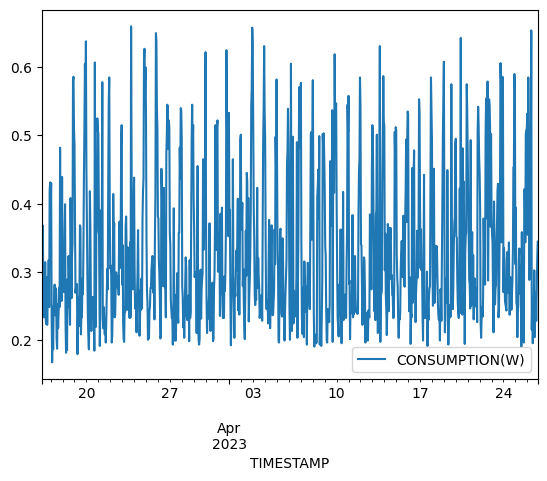

In [362]:
df_561_4.head(1000).plot()

<Axes: xlabel='TIMESTAMP'>

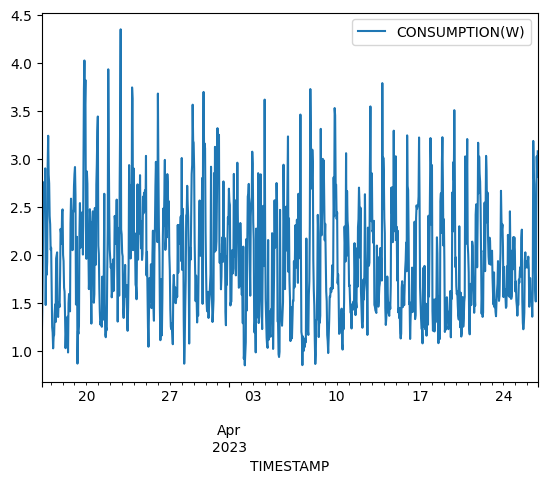

In [363]:
df_1234 = df_561_1 + df_561_2 + df_561_3 + df_561_4

df_1234.head(1000).plot()

In [364]:
df_561_5 = df.query("`BUILDING` == 561 and `FLOOR` == 5")
df_561_5['TIMESTAMP'] = pd.to_datetime(df_561_5['TIMESTAMP'])
df_561_5.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
df_561_5.set_index('TIMESTAMP', inplace=True)
df_561_5['CONSUMPTION(W)'] /= 1000
df_561_5 = df_561_5.resample(rule='60T').max()
df_561_5



C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\4005351663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_5['TIMESTAMP'] = pd.to_datetime(df_561_5['TIMESTAMP'])
C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\4005351663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_5.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
C:\Users\hansung\AppData\Local\Temp\ipykernel_13124\4005351663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:00:00,0.537
2023-03-16 07:00:00,0.514
2023-03-16 08:00:00,0.609
2023-03-16 09:00:00,0.419
2023-03-16 10:00:00,0.501
...,...
2023-08-30 06:00:00,0.518
2023-08-30 07:00:00,0.497
2023-08-30 08:00:00,0.591


<Axes: xlabel='TIMESTAMP'>

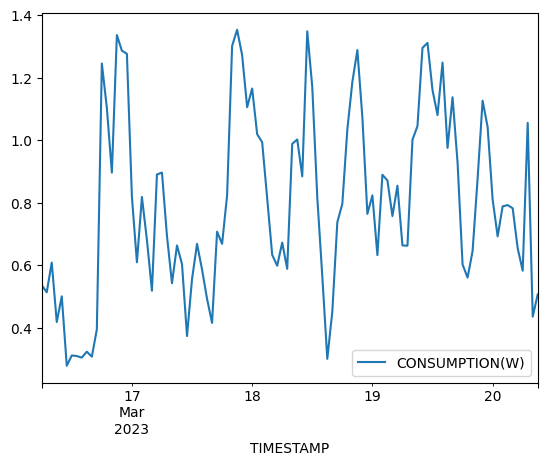

In [365]:
df_561_5.head(100).plot()

<Axes: xlabel='TIMESTAMP'>

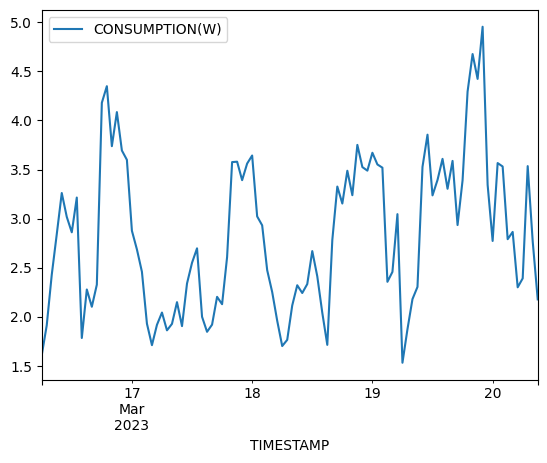

In [366]:
df_12345 = df_561_1 + df_561_2 + df_561_3 + df_561_4 + df_561_5

df_12345.head(100).plot()

In [367]:
df = df_1234

PREDICT_SIZE = 24

df['y'] = df.shift(PREDICT_SIZE)
df.dropna(inplace=True)

df

,CONSUMPTION(W),y
TIMESTAMP,,
2023-03-17 06:00:00,1.147,1.072
2023-03-17 07:00:00,1.169,1.400
2023-03-17 08:00:00,1.386,1.819
2023-03-17 09:00:00,1.486,2.422
2023-03-17 10:00:00,1.302,2.760
...,...,...
2023-08-30 06:00:00,1.964,1.636
2023-08-30 07:00:00,1.820,2.072
2023-08-30 08:00:00,1.710,3.089


In [368]:
train, test = train_test_split(df, test_size=0.1, shuffle=False)

print(train.shape)
print(test.shape)

(3590, 2)
(399, 2)


In [369]:
train

,CONSUMPTION(W),y
TIMESTAMP,,
2023-03-17 06:00:00,1.147,1.072
2023-03-17 07:00:00,1.169,1.400
2023-03-17 08:00:00,1.386,1.819
2023-03-17 09:00:00,1.486,2.422
2023-03-17 10:00:00,1.302,2.760
...,...,...
2023-08-13 15:00:00,3.405,2.911
2023-08-13 16:00:00,3.819,2.782
2023-08-13 17:00:00,3.518,2.890


In [370]:
test

,CONSUMPTION(W),y
TIMESTAMP,,
2023-08-13 20:00:00,3.525,2.910
2023-08-13 21:00:00,3.777,3.535
2023-08-13 22:00:00,4.016,3.563
2023-08-13 23:00:00,3.812,3.891
2023-08-14 00:00:00,4.122,3.958
...,...,...
2023-08-30 06:00:00,1.964,1.636
2023-08-30 07:00:00,1.820,2.072
2023-08-30 08:00:00,1.710,3.089


In [389]:
from sklearn.metrics import mean_absolute_error

x = train.values[:,:1]
y = train.values[:,-1:]

xgb = XGBRegressor(
            objective =  'reg:squarederror',
            eval_metric = mean_absolute_error,
            n_estimators=1000,
            gamma = 1,
            reg_lambda = 0, 
            learning_rate = 0.01,
            max_depth=10, 
            scale_pos_weight=100
        )

xgb.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function mean_absolute_error at 0x0000020CF05EAA60>,
             feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [390]:
# xgb.score(test['electric_energy_consumption(Wh)'], test['y']) #accuracy

In [391]:
# xgb.score(test['y'], test['y']) #accuracy

In [392]:
test['y'][:1000]

TIMESTAMP
2023-08-13 20:00:00    2.910
2023-08-13 21:00:00    3.535
2023-08-13 22:00:00    3.563
2023-08-13 23:00:00    3.891
2023-08-14 00:00:00    3.958
                       ...  
2023-08-30 06:00:00    1.636
2023-08-30 07:00:00    2.072
2023-08-30 08:00:00    3.089
2023-08-30 09:00:00    2.989
2023-08-30 10:00:00    2.803
Freq: 60T, Name: y, Length: 399, dtype: float64

<Axes: xlabel='TIMESTAMP'>

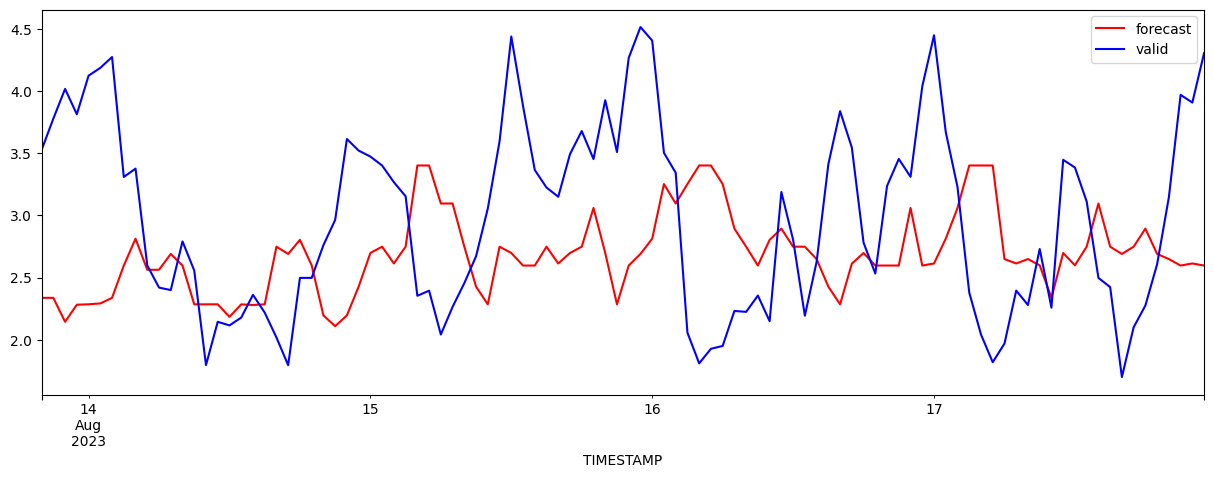

In [393]:
valid = pd.DataFrame({'valid' : test['CONSUMPTION(W)'][:100]})
forecast = pd.DataFrame({'forecast' : xgb.predict(train['y'][-100:])}, index = valid.index)

fig, ax = plt.subplots(figsize=(15,5))

forecast.plot(ax=ax, color='red', legend=True)
valid.plot(ax=ax, color='blue', legend=True)


0.129329995833516


<Axes: xlabel='TIMESTAMP'>

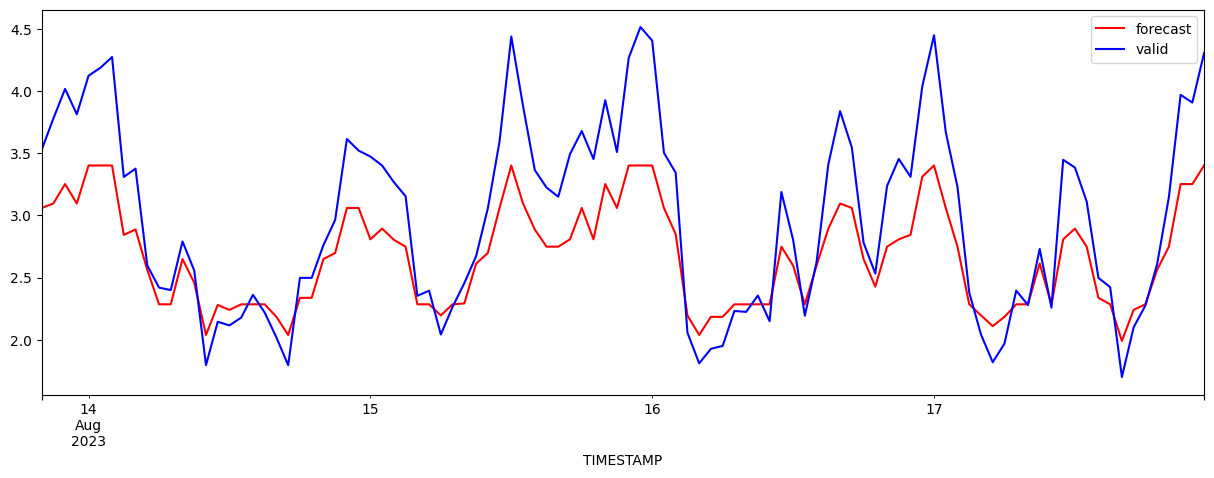

In [394]:

from sklearn.metrics import mean_absolute_percentage_error
valid = pd.DataFrame({'valid' : test['CONSUMPTION(W)'][:100]})
forecast = pd.DataFrame({'forecast' : xgb.predict(test['CONSUMPTION(W)'][:100])}, index = valid.index)

print(mean_absolute_percentage_error(forecast, valid))

fig, ax = plt.subplots(figsize=(15,5))

forecast.plot(ax=ax, color='red', legend=True)
valid.plot(ax=ax, color='blue', legend=True)
